# Modeling Data Using Machine Learning
## Multivariate Linear Regression

Being able to accurately price listings is important for real estate agents.
If they price too high, their client's home won't sell as fast. And, too low
and they leave money on the table. Our friend the real estate agent can use
linear and logistic regression to make her and her clients' lives easier.

Say a client comes to her to sell home in  Boston, which has the following 
features:

In [ ]:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

Lucky for the client, she has a set of data on Boston housing from 1978! She'll
create a model that she can then plug the client's data into and come up with an
estimate for selling price.

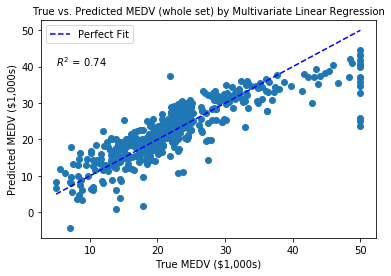

The model found for the whole dataset:
MEDV = 36.46 - 0.11*CRIM + 0.05*ZN + 0.02*INDUS + 2.69*CHAS - 17.77*NOX + 3.81*RM + 0.00*AGE - 1.48*DIS + 0.31*RAD - 0.01*TAX - 0.95*PTRATIO + 0.01*B - 0.52*LSTAT



In [3]:
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_regr(X,y,regr, title, size = 10):
    
    regr.fit(X, y)

    y_pred = regr.predict(X)
    plt.clf()
    plt.plot(y, y_pred, 'o')

    perfect_fit = np.linspace(y.min(),y.max(), 20)
    plt.plot(perfect_fit, perfect_fit, 'b--', label='Perfect Fit')

    
    plt.text(5, 40, "$R^2$ = %.2f" % regr.score(X,y))
    plt.title(title, size = size)
    plt.xlabel('True MEDV ($1,000s)')
    plt.ylabel('Predicted MEDV ($1,000s)')
    plt.legend()
    plt.show()

def write_equn(a, b, regr):

    regr.fit(a,b)

    equn = 'MEDV = %.2f' % regr.intercept_
    for feat, val in zip(data.feature_names, regr.coef_):
        if val > 0:
            equn += ' + %.2f*%s' % (val, feat)
        else:
            equn += ' - %.2f*%s' % (abs(val), feat)
    return equn

data = load_boston()
X = data.data
y = data.target
lin = linear_model.LinearRegression()

title = 'True vs. Predicted MEDV (whole set) by Multivariate Linear Regression'
plot_regr(X, y, lin, title)
equn_whole = write_equn(X,y, lin)
print("The model found for the whole dataset:\n{}\n".format(equn_whole))

Ok, now she has a model with a lot of variables. All she has to do is plug in
the correct info from her client's home and she can estimate it's price. She was
able to gather some of the information on her client's home:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       5
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      2.5
        - RAD      index of accessibility to radial highways
        - TAX      700
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

We'll plug in the mean values for the values we don't have, which assumes her
home is average for those features.

In [8]:
example = np.array([X.mean(axis=0)]).ravel()
example[5] = 5
example[7] = 2.5
example[9] = 700
example = example.reshape(1,-1)
example

array([[3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 5.00000000e+00, 6.85749012e+01, 2.50000000e+00,
        9.54940711e+00, 7.00000000e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]])

In [13]:
lin = linear_model.LinearRegression()
lin.fit(X,y)
y_pred = lin.predict(example)
print("She should price her client's home at $%5.2f, which is lower than the average price of $%5.2f" %
      (y_pred*1000, y.mean()*1000))

She should price her client's home at $15950.67, which is lower than the average price of $22532.81


She used the model, plugged in either the mean or the actual value if she had
it, and it returned an estimate of $15,950.67. This price will best balance
selling her client's home in a timely manner and not leaving any money on the
table.

Before she gets too confident about her prediction, she has to beware of a
couple of pitfalls: overfitting and applicability of the model. When she trains
her model on this Boston housing data set, it's learning the characteristics
of that data, or overfitting. It's an open question how well that data 
represents a house not in the dataset. For example, if the dataset was made up of trailer 
homes, it won't do well predicting price for a condo. The following image
illustrates under vs. overfitting:

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7NQXhuJ5ZwFJnTv8CYnrYqfQOM4m0Q6fTE-mesM_AV3SbnnIl1g)

She needs something that makes her confident her model isn't overfitting and
she can use it on a variety of homes. To deal with overfitting, she can use
regularization, which reduces the tendency of her model to learn the data in
the dataset, aka overfitting. In the following image, regularization moves the 
overfit model toward something closer to "just right" by penalizing high values
of $\theta_3$ and $\theta_4$.

![](http://www.holehouse.org/mlclass/07_Regularization_files/Image.png)

To deal with the question, "does this model actually work for my clients," 
she will use the training data to also test the model. This is a good way to 
confirm applicability. The following image illustrates how she will implement
cross-validation, or the applicability test for her dataset: 

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

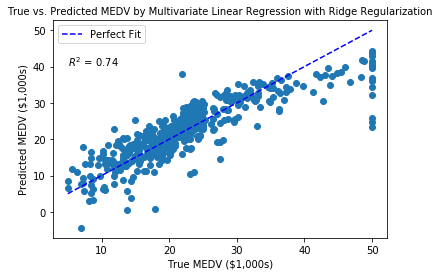

The model found by Ridge Regression:
MEDV = 31.60 - 0.10*CRIM + 0.05*ZN - 0.01*INDUS + 2.55*CHAS - 10.78*NOX + 3.85*RM - 0.01*AGE - 1.37*DIS + 0.29*RAD - 0.01*TAX - 0.88*PTRATIO + 0.01*B - 0.53*LSTAT



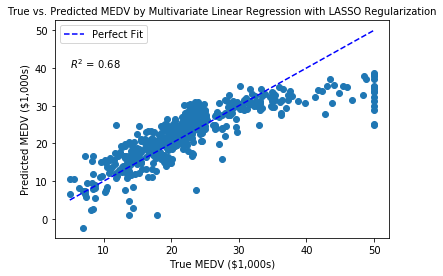

The model found by LASSO Regression:
MEDV = 41.06 - 0.06*CRIM + 0.05*ZN - 0.00*INDUS - 0.00*CHAS - 0.00*NOX + 0.95*RM + 0.02*AGE - 0.67*DIS + 0.26*RAD - 0.02*TAX - 0.72*PTRATIO + 0.01*B - 0.76*LSTAT



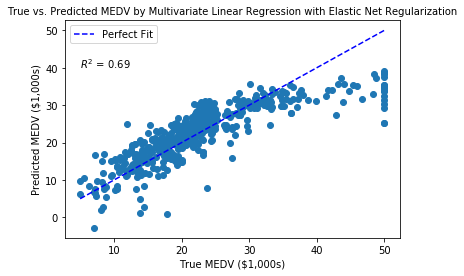

The model found by Elastic Net Regression:
MEDV = 42.23 - 0.08*CRIM + 0.05*ZN - 0.01*INDUS - 0.00*CHAS - 0.00*NOX + 0.93*RM + 0.02*AGE - 0.76*DIS + 0.30*RAD - 0.02*TAX - 0.75*PTRATIO + 0.01*B - 0.76*LSTAT



In [4]:

# Ridge regression
ridge = linear_model.Ridge(alpha=1.0)
title = 'True vs. Predicted MEDV by Multivariate Linear '+\
        'Regression with Ridge Regularization'
plot_regr(X, y, ridge, title)
equn_ridge = write_equn(X,y, ridge)
print("The model found by Ridge Regression:\n{}\n".format(equn_ridge))

# LASSO regression
lasso = linear_model.Lasso(alpha=1.0)
title = 'True vs. Predicted MEDV by Multivariate Linear '+\
        'Regression with LASSO Regularization'
plot_regr(X, y, lasso, title)
equn_lasso = write_equn(X,y, lasso)
print("The model found by LASSO Regression:\n{}\n".format(equn_lasso))

# Elastic-Net regression
el_net = linear_model.ElasticNet()
title = 'True vs. Predicted MEDV by Multivariate Linear '+\
        'Regression with Elastic Net Regularization'
plot_regr(X, y, el_net, title)
equn_el_net = write_equn(X,y, el_net)
print("The model found by Elastic Net Regression:\n{}\n".format(equn_el_net))

Regularization tends to push the value of the learned parameters lower,
sometimes to zero, by deciding whether a feature (i.e. CRIM, RM, etc.) is
actually a good predictor. The result is a less complex model less prone to
overfitting. 

Other questions she has are: does this model work? Can I use this
to price a
house on the north side of the city or the south? By creating a train
and test
split (cross-validation) from the data, she can test the model on data
it hasn't yet seen.
If the model works well on the test set, she can feel more
confident.

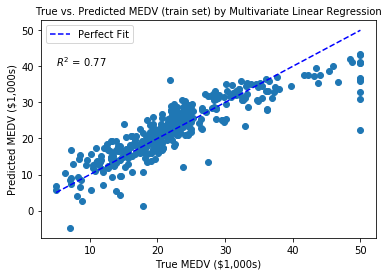

The model found for the train dataset:
MEDV = 36.93 - 0.12*CRIM + 0.04*ZN - 0.01*INDUS + 2.39*CHAS - 15.59*NOX + 3.77*RM - 0.01*AGE - 1.43*DIS + 0.24*RAD - 0.01*TAX - 0.99*PTRATIO + 0.01*B - 0.50*LSTAT



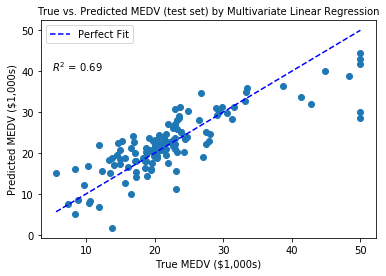

The model found for the test dataset:
MEDV = 23.92 - 0.08*CRIM + 0.04*ZN + 0.07*INDUS + 3.70*CHAS - 16.69*NOX + 4.52*RM + 0.01*AGE - 1.28*DIS + 0.45*RAD - 0.01*TAX - 0.81*PTRATIO + 0.02*B - 0.58*LSTAT



In [17]:
# split data into train/test sets and show fit 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

title = 'True vs. Predicted MEDV (train set) by Multivariate Linear Regression'
plot_regr(X_train, y_train, lin, title)
equn_train = write_equn(X_train, y_train, lin)
print("The model found for the train dataset:\n{}\n".format(equn_train))

title = 'True vs. Predicted MEDV (test set) by Multivariate Linear Regression'
plot_regr(X_test, y_test, lin, title)
equn_test = write_equn(X_test, y_test, lin)
print("The model found for the test dataset:\n{}\n".format(equn_test))

The train set has a higher $R^2$ value compared to the test set-the $R^2$ value
is in [0,1], and it measures how well the model explains the dataset. This
happens because the model hasn't seen those data points yet. Even still, the
fit is still good and it should help her to price her client's home.

To sum up, she used a model built from past data on Boston housing to give
her client a good estimate of sale price. She used regularization to reduce the 
chances her model had only learned the data from the dataset. And, she split
up the data into train and test sets to test/cross-validate how well it did on
new data; therefore, she can be confident in feeding it new data from her 
clients it was not originally trained on.

Next up, we'll see how our friend the real estate agent can decide whether 
adding a bedroom to a house as an addition will pay off using multivariate 
logistic regression with the same dataset. 

## Multivariate Logistic Regression

Previously, we saw how a real estate agent could make a model to accurately
price her client's home to balance time on the market and not leaving money on
the table. Now, our friend the agent has a client who wants to add a bedroom to
their home, but he's wondering how it will affect the value and whether he will
recoup his investment. More precisely, he wants to know the probability his home
will be worth more than the average home price in his neighborhood after the 
addition. He's in luck, because she has a multivariate  logistic regression 
model she's been waiting to put to use!

As a reminder her model has the following features:

In [ ]:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

He gives her all the information he has on his house:

In [ ]:
- CRIM     8.5
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       3
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      1.5
- RAD      index of accessibility to radial highways
- TAX      650
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

Now, using logistic regression, she can give him the probability his house
price, after the addition, will be greater than the mean house value for his 
region.

In [7]:
import numpy as np 
import scikitplot.plotters as skplt
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_roc(X,y,regr, title, size = 10):
    
    regr.fit(X, y)

    y_pred = regr.predict_proba(X)
    skplt.plot_roc_curve(y, y_pred, title = title)
    plt.show()

def write_equn(a, b, regr):

    regr.fit(a,b)

    equn = 'MEDV = %.2f' % regr.intercept_
    for feat, val in zip(data.feature_names, regr.coef_.T):
        if val > 0:
            equn += ' + %.2f*%s' % (val, feat)
        else:
            equn += ' - %.2f*%s' % (abs(val), feat)
    return equn
def classify(y, threshold):
    y_clf = []
    for val in y:
        if val > threshold:
            y_clf.append(1)
        else:
            y_clf.append(0)

    return np.array(y_clf)

Next, we will fit our logistic regression model and see how well it classifies our
data with an ROC curve. As a reminder on ROC curves, they're measuring how well 
the model classifies data points. In our case, that corresponds to correctly 
labelling points with values (MEDV) greater than the mean versus those less than. 
Additionally, an area of 1 is the max score possible, so .95 is pretty good and 
shows our model works well as a classifier.

/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


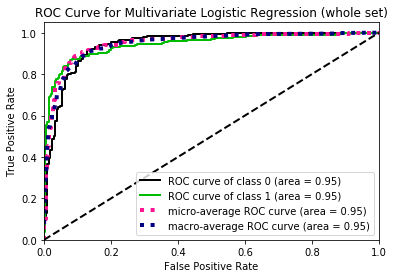

The model found for the whole dataset:
MEDV = 0.64 - 0.04*CRIM + 0.01*ZN - 0.02*INDUS + 0.51*CHAS + 0.12*NOX + 1.65*RM - 0.02*AGE - 0.43*DIS + 0.15*RAD - 0.01*TAX - 0.29*PTRATIO + 0.00*B - 0.31*LSTAT



/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
data = load_boston()
X = data.data
target_mean = classify(data.target, data.target.mean())

log = linear_model.LogisticRegression()

title = 'ROC Curve for Multivariate Logistic Regression (whole set)'
plot_roc(X, target_mean, log, title)
equn_whole = write_equn(X,target_mean, log)
print("The model found for the whole dataset:\n{}\n".format(equn_whole))

## Exercise
Your task is to predict the probability the client's home will be worth more than 
average after adding an additional room. You will need to:

- fill in the corresponding values for his home
- fill in the mean for all missing values
- add the vector as the variable to the call to log.predict_proba()

In [ ]:
# run this cell to pull up documentation
import numpy as np
from sklearn import linear_model
#?np.ravel
#?np.mean

In [14]:

#--------------------------Enter your Code Here-------------#
example = np.array([X.mean(axis=0)]).ravel()
example[0] = 8.5
# 3+1 RMs after the addition
example[5] = 4
example[7] = 1.5
example[9] = 650
example = example.reshape(1,-1)

log.fit(X, target_mean)
print("P(MEDV > mean | RM=4; CRIM=0; DIS=1.5; TAX=650) = %.2f" % log.predict_proba(example)[0,1])
#------------------------------------------------------------#

P(MEDV > mean | RM=4; CRIM=0; DIS=1.5; TAX=650) = 0.01


/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# mean number of RMs
X[:,5].mean(axis=0)

6.284634387351779

Unfortunately, the probability of his house being greater than average post-
addition is only 1% and our model would predict the 0 class (instead of 1). The 
mean number of rooms is 6.28, yet the client only has 4. So, it makes sense this 
house sells for a discount.

## Regularization

Similar to the linear case, she has two concerns about her model:
overfitting and generalizability (I'm not selling homes that were in the
dataset it was trained on; still, can I use this model for my clients?). Next,
we'll introduce regularization to our model to address overfitting with some 
graphs to see the effects.

/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


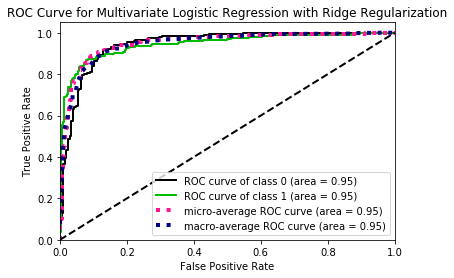

/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


The model found by Ridge Regression:
MEDV = 0.64 - 0.04*CRIM + 0.01*ZN - 0.02*INDUS + 0.51*CHAS + 0.12*NOX + 1.65*RM - 0.02*AGE - 0.43*DIS + 0.15*RAD - 0.01*TAX - 0.29*PTRATIO + 0.00*B - 0.31*LSTAT



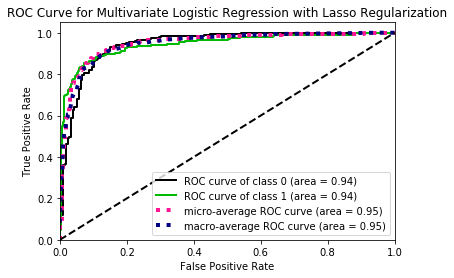

/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


The model found by LASSO Regression:
MEDV = 0.00 - 0.04*CRIM + 0.01*ZN - 0.02*INDUS + 0.20*CHAS - 0.00*NOX + 1.74*RM - 0.02*AGE - 0.43*DIS + 0.15*RAD - 0.01*TAX - 0.29*PTRATIO + 0.00*B - 0.30*LSTAT



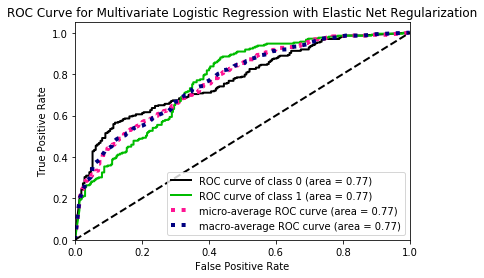

The model found by Elastic Net Regression:
MEDV = 27.62 - 458.72*CRIM + 4021.44*ZN - 1153.83*INDUS + 102.41*CHAS + 8.06*NOX + 988.11*RM - 4049.24*AGE - 782.54*DIS + 688.66*RAD - 471.70*TAX - 1778.93*PTRATIO + 2031.08*B - 7895.94*LSTAT



/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [12]:
# Ridge regression
ridge = linear_model.LogisticRegression(penalty='l2')
title = 'ROC Curve for Multivariate Logistic Regression with' +\
        ' Ridge Regularization'
plot_roc(X, target_mean, ridge, title)
equn_ridge = write_equn(X,target_mean, ridge)
print("The model found by Ridge Regression:\n{}\n".format(equn_ridge))

# LASSO regression
lasso = linear_model.LogisticRegression(penalty='l1')
title = 'ROC Curve for Multivariate Logistic Regression with' +\
        ' Lasso Regularization'
plot_roc(X, target_mean, lasso, title)
equn_lasso = write_equn(X,target_mean, lasso)
print("The model found by LASSO Regression:\n{}\n".format(equn_lasso))

# Elastic-Net regression
scaler = StandardScaler()
enet_data = X.copy()
scaler.fit(enet_data)
enet_data = scaler.transform(enet_data)
el_net = linear_model.SGDClassifier(loss='log', penalty='elasticnet')
title = 'ROC Curve for Multivariate Logistic Regression with' +\
        ' Elastic Net Regularization'
plot_roc(enet_data, target_mean, el_net, title)
equn_el_net = write_equn(X,target_mean, el_net)
print("The model found by Elastic Net Regression:\n{}\n".format(equn_el_net))

She sees she can use either Ridge or LASSO regularization with her model.
The area under the ROC curve for Ridge and LASSO are greater than 0.94. Elastic
Net has an area under the curve of 0.77. Either Ridge or LASSO are good 
candidates to combat overfitting without losing predictive ability. 
Unfortunately, there is some loss of predictive ability with Elastic Net 
regularization.  

## Cross-Validation
Next, she will try a train/test split of the data. It will give  her a chance 
to test her model on data it hasn't yet seen instead of using her clients as 
guinea pigs.

/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


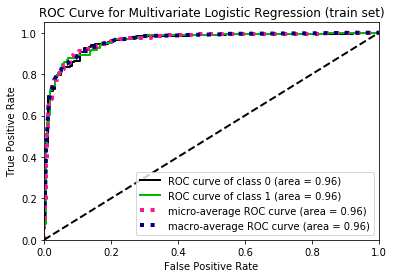

/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


The model found for the train dataset:
MEDV = 0.61 - 0.17*CRIM + 0.00*ZN - 0.03*INDUS + 0.17*CHAS + 0.29*NOX + 1.68*RM - 0.02*AGE - 0.40*DIS + 0.14*RAD - 0.00*TAX - 0.37*PTRATIO + 0.01*B - 0.33*LSTAT



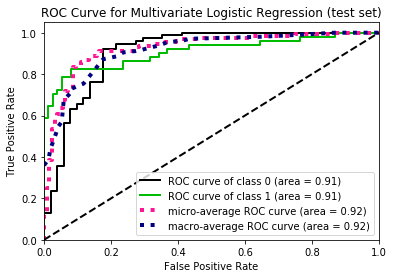

The model found for the test dataset:
MEDV = 0.19 - 0.02*CRIM + 0.02*ZN + 0.01*INDUS + 0.33*CHAS - 0.01*NOX + 1.42*RM - 0.02*AGE - 0.46*DIS + 0.23*RAD - 0.01*TAX - 0.23*PTRATIO + 0.01*B - 0.27*LSTAT



/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
# split data into train/test sets and show fit 
X_train, X_test, y_train, y_test = train_test_split(X,target_mean, random_state=0)

title = 'ROC Curve for Multivariate Logistic Regression (train set)'
plot_roc(X_train, y_train, log, title)
equn_train = write_equn(X_train, y_train, log)
print("The model found for the train dataset:\n{}\n".format(equn_train))

title = 'ROC Curve for Multivariate Logistic Regression (test set)'
plot_roc(X_test, y_test, log , title)
equn_test = write_equn(X_test, y_test, log)
print("The model found for the test dataset:\n{}\n".format(equn_test))

The area under ROC for the train set is 0.96 and 0.91 for the test set.
The model applied to the test data doesn't do as well as on the train data, as
she would expect. This happens because the model learned on the train set, and
it is seeing the test data for the first time. Because there was no big fall in
performance (area fell from .96 to .91) from train to test, she
can be confident in using her model with her clients.

## Conclusion 
To sum up, a client came to our friend the real estate agent interested to know 
whether adding a room to his home would pay off for him by increasing its value
above the mean for his neighborhood. This question has a yes or no answer, so
it is a classification problem-a perfect fit for a classification model like
logistic regression. She used regularization to reduce overfitting, which is the 
tendency to learn the dataset's idiosyncracies too closely. And, she used a train/test 
split (cross-validation) so she could be confident her model worked on unseen 
data, rather than testing on her clients. Multivariate Logistic Regression 
makes for a great tool in her tool belt when asking yes/no type questions about 
her clients' homes.